In [ ]:
from transformers import pipeline

pipe = pipeline("image-to-text", model="raxtemur/trocr-base-ru")

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount("/content/gdrive")
data_path = Path("/content/gdrive/MyDrive/ragaik/sample_aik_ru_text/dump_medium")

Mounted at /content/gdrive


In [ ]:
paths = sorted(data_path.glob("*.png"))

In [ ]:
from tqdm import tqdm

preds = [pipe(str(path)) for path in tqdm(paths)]



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:36<02:26, 36.61s/it]

 40%|████      | 2/5 [01:04<01:35, 31.75s/it]

 60%|██████    | 3/5 [01:41<01:08, 34.15s/it]

 80%|████████  | 4/5 [02:38<00:42, 42.81s/it]

100%|██████████| 5/5 [03:31<00:00, 42.28s/it]


In [ ]:
preds

[[{'generated_text': 'Георгиева,Лаусто, трипультурного,'}],
 [{'generated_text': 'Восточного также назаторожного'}],
 [{'generated_text': 'непозволяют нахитовалось колобистической.'}],
 [{'generated_text': 'Упр.ДеревняДейственностьСтихирово-последования Видеотв'}],
 [{'generated_text': 'Е.Добавление КрадаДобавательность Команда,перепавшица'}]]

In [ ]:
from PIL import Image

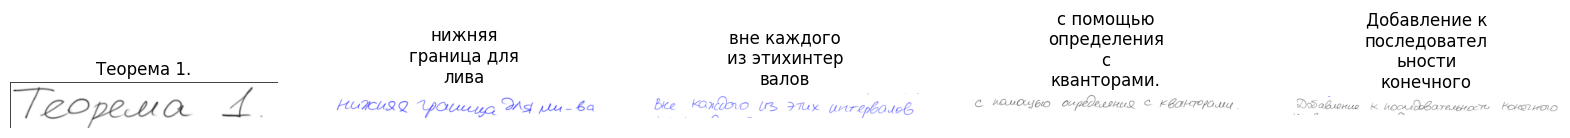

In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")


sample_images_to_visualize = [Image.open(path) for path in paths]
plot_images(sample_images_to_visualize, [d[0]["generated_text"] for d in preds])

In [ ]:
data_path = Path("/content/gdrive/MyDrive/ragaik/sample_aik_ru_text/dump_small")
paths = sorted(data_path.glob("*.png"))

In [ ]:
from tqdm import tqdm

preds = [pipe(str(path)) for path in tqdm(paths)]



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:11<00:46, 11.73s/it]

 40%|████      | 2/5 [00:34<00:54, 18.05s/it]

 60%|██████    | 3/5 [01:05<00:48, 24.15s/it]

 80%|████████  | 4/5 [01:41<00:28, 28.59s/it]

100%|██████████| 5/5 [02:22<00:00, 28.46s/it]


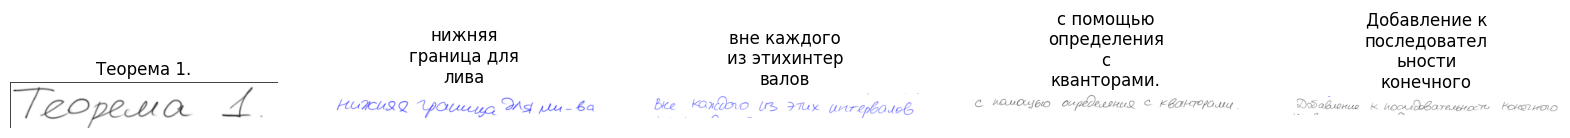

In [ ]:
sample_images_to_visualize = [Image.open(path) for path in paths]
plot_images(sample_images_to_visualize, [d[0]["generated_text"] for d in preds])

**Мораль**: чем меньше боксы, тем лучше.